In [2]:
import pandas as pd

In [4]:
## load csv file into pandas dataframe
df = pd.read_csv('CA_2020_PM2.5.csv')

df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,local_site_name,address,state,county,city,tribal_code,tribal_land,cbsa_code,cbsa,date_of_last_change
0,6,59,7,88101,1,33.83062,-117.938450,WGS84,PM2.5 - Local Conditions,24 HOUR,...,Anaheim,1630 W. PAMPAS LANE,California,Orange,Anaheim,NaN,NaN,31080.0,"Los Angeles-Long Beach-Anaheim, CA",2021-10-31
1,6,59,7,88101,1,33.83062,-117.938450,WGS84,PM2.5 - Local Conditions,24 HOUR,...,Anaheim,1630 W. PAMPAS LANE,California,Orange,Anaheim,NaN,NaN,31080.0,"Los Angeles-Long Beach-Anaheim, CA",2021-10-31
2,6,59,7,88101,1,33.83062,-117.938450,WGS84,PM2.5 - Local Conditions,24 HOUR,...,Anaheim,1630 W. PAMPAS LANE,California,Orange,Anaheim,NaN,NaN,31080.0,"Los Angeles-Long Beach-Anaheim, CA",2021-10-31
3,6,59,7,88101,1,33.83062,-117.938450,WGS84,PM2.5 - Local Conditions,24 HOUR,...,Anaheim,1630 W. PAMPAS LANE,California,Orange,Anaheim,NaN,NaN,31080.0,"Los Angeles-Long Beach-Anaheim, CA",2021-10-31
4,6,59,7,88101,1,33.83062,-117.938450,WGS84,PM2.5 - Local Conditions,24 HOUR,...,Anaheim,1630 W. PAMPAS LANE,California,Orange,Anaheim,NaN,NaN,31080.0,"Los Angeles-Long Beach-Anaheim, CA",2021-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,6,111,3001,88101,3,34.25239,-119.143182,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,El Rio-Rio Mesa School #2,"545 CENTRAL AVENUE, OXNARD, CA 93030",California,Ventura,NaN,NaN,NaN,37100.0,"Oxnard-Thousand Oaks-Ventura, CA",2021-10-31
14708,6,111,3001,88101,3,34.25239,-119.143182,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,El Rio-Rio Mesa School #2,"545 CENTRAL AVENUE, OXNARD, CA 93030",California,Ventura,NaN,NaN,NaN,37100.0,"Oxnard-Thousand Oaks-Ventura, CA",2021-10-31
14709,6,111,3001,88101,3,34.25239,-119.143182,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,El Rio-Rio Mesa School #2,"545 CENTRAL AVENUE, OXNARD, CA 93030",California,Ventura,NaN,NaN,NaN,37100.0,"Oxnard-Thousand Oaks-Ventura, CA",2021-10-31
14710,6,111,3001,88101,3,34.25239,-119.143182,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,El Rio-Rio Mesa School #2,"545 CENTRAL AVENUE, OXNARD, CA 93030",California,Ventura,NaN,NaN,NaN,37100.0,"Oxnard-Thousand Oaks-Ventura, CA",2021-10-31


In [5]:
## show columns in dataframe
df.columns


Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration',
       'sample_duration_code', 'sample_duration_type', 'pollutant_standard',
       'year', 'quarter', 'units_of_measure', 'event_type',
       'observation_count', 'observation_percent', 'arithmetic_mean',
       'minimum_value', 'maximum_value', 'quarterly_criteria_met',
       'actual_days_gt_std', 'estimated_days_gt_std', 'valid_samples',
       'valid_day_count', 'scheduled_samples', 'percent_days',
       'percent_one_value', 'monitoring_agency_code', 'monitoring_agency',
       'local_site_name', 'address', 'state', 'county', 'city', 'tribal_code',
       'tribal_land', 'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')

In [8]:
## count number of unique sites

len(df['local_site_name'].unique())

122

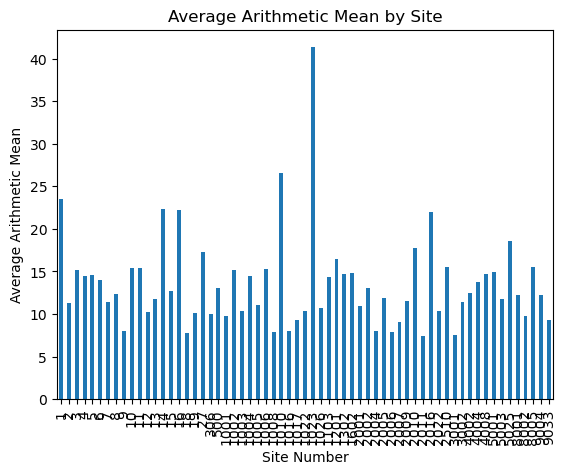

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's assume your DataFrame is named df
grouped = df.groupby('site_number').arithmetic_mean.mean()  # change to your metric of interest
grouped.plot(kind='bar')

plt.title('Average Arithmetic Mean by Site')
plt.xlabel('Site Number')
plt.ylabel('Average Arithmetic Mean')
plt.show()

In [10]:
%pip install folium


Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple
     ------------------------------------ 102.3/102.3 kB 210.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import folium
from folium.plugins import HeatMap

# Let's assume your DataFrame is named df
df_grouped = df.groupby(['site_number', 'latitude', 'longitude'])['arithmetic_mean'].mean().reset_index()

m = folium.Map(location=[df_grouped['latitude'].mean(), df_grouped['longitude'].mean()], zoom_start=4)

# List comprehension to make out list of lists
heat_data = [[row['latitude'], row['longitude'], row['arithmetic_mean']] for index, row in df_grouped.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)

# Display the map
m